# Predict the Diamond Prices

Project 1 for Udacity Predictive Analytics for Business Nanodegree.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## Read and understand the data

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [3]:
df = df.drop(columns=["Unnamed: 0"])

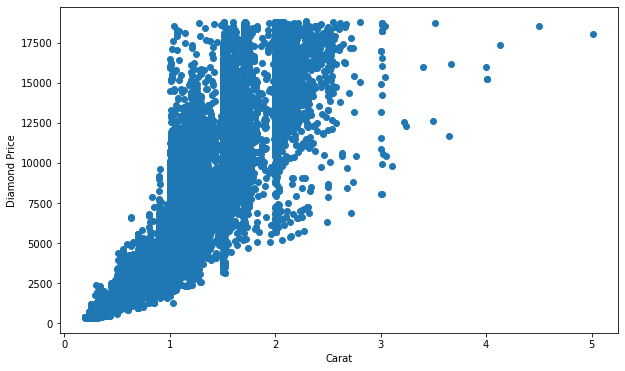

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['carat'], y = df['price'])
plt.xlabel("Carat")
plt.ylabel("Diamond Price")

plt.show()

In [5]:
df['price/wt']=df['price']/df['carat']
print(df.groupby('cut')['price/wt'].mean().sort_values())
print(df.groupby('color')['price/wt'].mean().sort_values())
print(df.groupby('clarity')['price/wt'].mean().sort_values())
df = df.drop(['price/wt'], axis=1)

cut
Fair         3769.610484
Good         3867.429167
Ideal        3919.607121
Very Good    4008.257672
Premium      4231.958268
Name: price/wt, dtype: float64
color
E    3806.437066
J    3826.455429
D    3943.992213
I    4006.772364
H    4014.065166
F    4134.934152
G    4165.128317
Name: price/wt, dtype: float64
clarity
I1      2798.092286
VVS1    3851.618744
SI1     3851.813147
SI2     4003.718128
VS2     4084.974978
VS1     4162.981030
VVS2    4194.280703
IF      4286.263857
Name: price/wt, dtype: float64


In [6]:
df['cut']=df['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

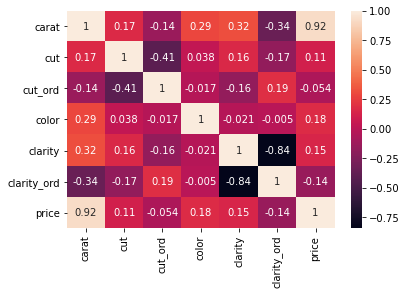

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
df['cut/wt']=df['cut']/df['carat']
df['color/wt']=df['color']/df['carat']
df['clarity/wt']=df['clarity']/df['carat']
df = df.drop(['cut','color','clarity'], axis=1)

In [23]:
df.head()

,carat,cut_ord,clarity_ord,price,cut/wt,color/wt,clarity/wt
0,0.51,4,4,1749,9.803922,5.882353,7.843137
1,2.25,1,1,7069,1.777778,1.777778,2.222222
2,0.70,3,5,2757,4.285714,1.428571,8.571429
3,0.47,2,4,1243,4.255319,6.382979,8.510638
4,0.30,5,7,789,3.333333,13.333333,3.333333


In [9]:
X = df.drop(columns=["price"])
y = df["price"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [61]:
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)

Rsquare=regr.score(X_test,y_test)
print("Rsquare: %f" %(Rsquare))

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Variable']
coeff_df["Coeff"] = pd.Series(regr.coef_)
coeff_df.sort_values(by='Coeff', ascending=True)
print(coeff_df)
print("Intercept: %f" %(regr.intercept_))

mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))

Rsquare: 0.901887
      Variable        Coeff
0        carat  9212.058455
1      cut_ord   179.338768
2  clarity_ord   671.195285
3       cut/wt    30.043149
4     color/wt   -58.974524
5   clarity/wt   110.191749
Intercept: -7658.555299
mae: 826.539544
rmse: 1253.480825


In [62]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))

Rsquare=regressor.score(X_test,y_test)
print("Rsquare: %f" %(Rsquare))

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))

mae: 324.064811
Rsquare: 0.972995
rmse: 657.615884


C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

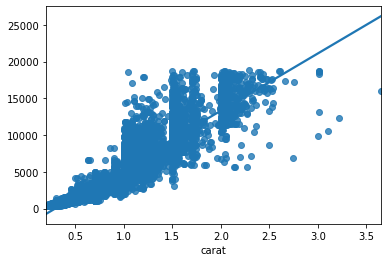

In [63]:
sns.regplot(X_test['carat'], y_pred, ci=None)

C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color/wt'>

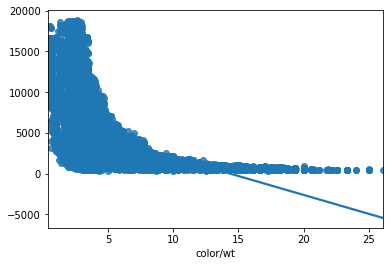

In [64]:
sns.regplot(X_test['color/wt'], y_pred, ci=None)

In [66]:
df_new = pd.read_csv('new-diamonds.csv')
df_new.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


In [67]:
df_new = df_new.drop(columns=['Unnamed: 0'])

In [69]:
df_new['cut']=df_new['cut'].map({'Ideal':1,'Good':2,'Very Good':3,'Fair':4,'Premium':5})
df_new['color']=df_new['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
df_new['clarity']=df_new['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})

In [70]:
df_new['cut/wt']=df_new['cut']/df_new['carat']
df_new['color/wt']=df_new['color']/df_new['carat']
df_new['clarity/wt']=df_new['clarity']/df_new['carat']
df_new = df_new.drop(['cut','color','clarity'], axis=1)

In [73]:
df_new["Predicted Price"] = regressor.predict(df_new)
df_new

,carat,cut_ord,clarity_ord,cut/wt,color/wt,clarity/wt,Predicted Price
0,1.22,4,3,4.098361,3.278689,5.737705,6470.500000
1,1.01,2,5,1.980198,3.960396,5.940594,5606.461538
2,0.71,3,5,4.225352,8.450704,8.450704,2047.000000
3,1.01,5,2,0.990099,1.980198,7.920792,4831.375000
4,0.27,5,6,3.703704,18.518519,11.111111,554.500000
...,...,...,...,...,...,...,...
2995,0.72,5,2,1.388889,4.166667,11.111111,2313.000000
2996,1.09,4,5,4.587156,5.504587,5.504587,4589.000000
2997,1.05,3,3,2.857143,3.809524,6.666667,5218.000000
2998,0.70,1,3,5.714286,5.714286,10.000000,2155.666667


In [75]:
df_new.to_csv("predicted-diamonds-price.csv")

C:\Users\hamzahf\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='Predicted Price'>

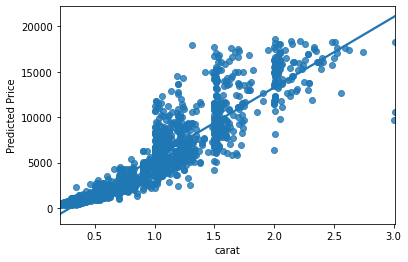

In [77]:
sns.regplot(df_new['carat'], df_new["Predicted Price"], ci=None)